Normalising Image: 	 ss/faa-gov/0/screenshotnav-class-hNav.png
1095718 3793882
Saving Comp 0
writing image
Saving Comp 1
writing image
Saving Comp 2
writing image


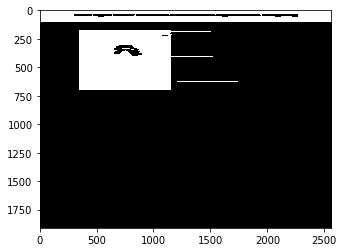

In [5]:
#####
#####  1. Aim:
#####           a/ Normalise -> Set background as 0 and everything else in their primary colors
#####           b/ find disconnected components
#####

# import the necessary packages
import cv2, os
import numpy as np
import skimage
from matplotlib import pyplot as plt


def RemoveTempFolders(someList):
    for item in someList:
        if item[0] == ".":
            someList.remove(item)
    return someList

def normalise(img, background = [255,255,255]):
    # change background to black(0)
    # transorm the rest of the pixels to
    # monotone for easier comparison later
    black = 0
    white = 255
    k = 0
    l=0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if list(img[i][j]) == background:
                img[i][j] = black
                l+=1
            else:
                img[i][j] = white
                k+=1
    print (k,l)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def breakIntoComponents (img = "ss/faa-gov/0/screenshotnav-class-hNav.png"):
    img0 = cv2.imread (img)

    print ("Normalising Image: \t", img)
    img0_norm = normalise(img0)


    labels, markers = cv2.connectedComponents(img0_norm.astype(np.uint8),connectivity=8)

    img0_mask = skimage.measure.label(markers, background = 0).flatten()

    for i in range (3):    #put range(labels)
        component = np.where(img0_mask==1)[0]
        print ("Saving Comp", i)
        saveComponent(component,markers.shape,i)


def saveComponent (comp,shape,i):

    sizeForFlatten = shape[0]*shape[1]

    mask = np.zeros(sizeForFlatten)
    for c in comp:
        mask[c] = 1

    mask = cv2.erode(mask, np.ones((50, 50)))

    mask = mask.reshape(shape[0],shape[1])

    print ("writing image")
    cv2.imwrite(str(i)+".jpg", mask)

    plt.imshow(mask, interpolation='nearest',cmap='gray')
    # a =input ()
breakIntoComponents("ss/faa-gov/0/screenshotnav-class-hNav.png")


NameError: name 'mask' is not defined

In [36]:
def removeLeadingZeros(mask):
    for i in range (len(mask)):
        if np.count_nonzero (mask[0]) == 0:
            mask = np.delete(mask, 0,0)
        else:
            continue
    return mask

def removeTailingZeros(mask):
    for i in range (len(mask)-1,0,-1):
        if np.count_nonzero (mask[len(mask)-1]) == 0:
            mask = np.delete(mask,len(mask)-1,0)
        else:
            continue
    return mask

A = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,1,1,1,0],[0,0,1,0,1,0],[0,0,1,0,1,0], [0,0,0,0,0,0]])
print (A)

A = removeLeadingZeros(A)
A = removeTailingZeros(A)
A = np.transpose(A)
A = removeLeadingZeros(A)
A = removeTailingZeros(A)
A = np.transpose(A)

print (A)


[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 0 1 0]
 [0 0 1 0 1 0]
 [0 0 0 0 0 0]]
[[1 1 1]
 [1 0 1]
 [1 0 1]]


In [41]:
len(A.flatten())

9

In [49]:
a = np.zeros(10*3)

a = a.reshape (10,3)

a = a.reshape (5,2,3)



print(a)

[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]


In [54]:
np.array([0,0,0]).sum() == 0

True

In [71]:
img1 = cv2.imread('1/1.jpg')
img1_norm = normalise(img1)


(1910, 2560)
4168122 721478


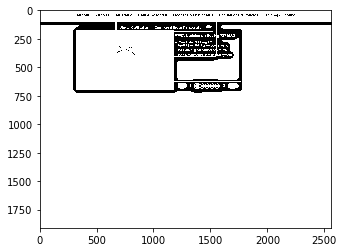

In [4]:
import cv2, os
import numpy as np
import skimage
from matplotlib import pyplot as plt

img0 = cv2.imread('1/1.jpg',cv2.CV_8UC1)
img0_norm = cv2.adaptiveThreshold(img0,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,10)
plt.imshow(img0_norm,interpolation='nearest',cmap='gray')


In [5]:
plt.imshow(img1_norm,interpolation='nearest',cmap='gray')


NameError: name 'img1_norm' is not defined

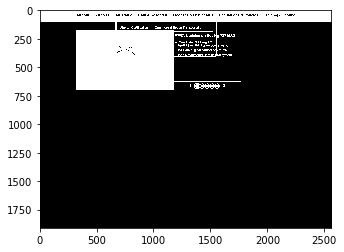

In [9]:
img1 = cv2.imread('1/1.jpg')

_, threshold = cv2.threshold(img1, 155, 255, cv2.THRESH_BINARY)

plt.imshow( threshold,interpolation='nearest',cmap='gray')

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


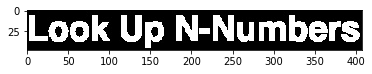

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('1/2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)


contours = [cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)]
cnt = contours[0][0]
x,y,w,h = cv2.boundingRect(cnt)


crop = img[y:y+h,x:x+w]
# cv2.imwrite('sofwinres.png',crop)
plt.imshow (crop)

print (img)

In [22]:
def normalise(img, background = [255,255,255]):
    # change background to black(0)
    # transorm the rest of the pixels to
    # monotone for easier comparison later
    black = 0
    white = 255
    k = 0
    l=0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if list(img[i][j]) == background:
                img[i][j] = black
                l+=1
            else:
                img[i][j] = white
                k+=1
    print (k,l)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img1 = cv2.imread('1/2.jpg')
img1 = normalise(img1)

4885089 4511


In [40]:
# img = cv2.imread('1/2.jpg')

# print (img.shape,img1.shape)

# img = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(img1,1,255,cv2.THRESH_BINARY_INV)


contours = [cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)]
cnt = contours[0][0]
x,y,w,h = cv2.boundingRect(cnt)

crop = img[y:y+h,x:x+w]
# cv2.imwrite('sofwinres.png',crop)
plt.imshow (crop)

TypeError: 'NoneType' object is not subscriptable

<class 'numpy.ndarray'>


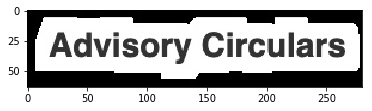

In [52]:
img = cv2.imread('1/2.jpg')

# print (img.shape,img1.shape)

print (type(img))

# img = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)


contours = [cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)]
cnt = contours[0][0]
x,y,w,h = cv2.boundingRect(cnt)

crop = img[y:y+h,x:x+w]
# cv2.imwrite('sofwinres.png',crop)
plt.imshow (crop)

In [54]:
def normalise(img, background = [255,255,255]):
    # change background to black(0)
    # transorm the rest of the pixels to
    # monotone for easier comparison later
    black = 0
    white = 255
    k = 0
    l=0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if list(img[i][j]) == background:
                img[i][j] = black
                l+=1
            else:
                img[i][j] = white
                k+=1
    print (k,l)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


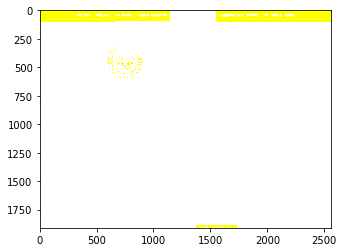

In [82]:
img0 = cv2.imread ("ss/faa-gov/0/screenshotnav-class-hNav.png")
shape = img0.shape
img0_ = img0.flatten()

img0_[img0_ > 0] = 255
img0_ = img0_.reshape(shape)

plt.imshow (img0_,interpolation='nearest',cmap='gray')

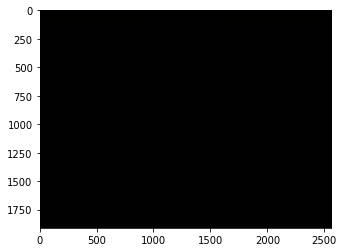

In [73]:
# _, img0_norm = cv2.threshold(img0, 155, 255, cv2.THRESH_TOZERO_INV)

# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

x = img0
x[x > 0] = 1

plt.imshow (img0,interpolation='nearest',cmap='gray')

In [84]:
from skimage.measure import compare_ssim as ssim
import cv2, os
import numpy as np
from subImageSearch import find_image
from PIL import Image

In [85]:
def find_image(im, tpl):
    im = np.atleast_3d(im)
    tpl = np.atleast_3d(tpl)
    H, W, D = im.shape[:3]
    h, w = tpl.shape[:2]

    # Integral image and template sum per channel
    sat = im.cumsum(1).cumsum(0)
    tplsum = np.array([tpl[:, :, i].sum() for i in range(D)])

    # Calculate lookup table for all the possible windows
    iA, iB, iC, iD = sat[:-h, :-w], sat[:-h, w:], sat[h:, :-w], sat[h:, w:]
    lookup = iD - iB - iC + iA
    # Possible matches
    possible_match = np.where(np.logical_and.reduce([lookup[..., i] == tplsum[i] for i in range(D)]))

    # Find exact match
    for y, x in zip(*possible_match):
        if np.all(im[y+1:y+h+1, x+1:x+w+1] == tpl):
            return (y+1, x+1)

    return False 
    raise Exception("Image not found")

255

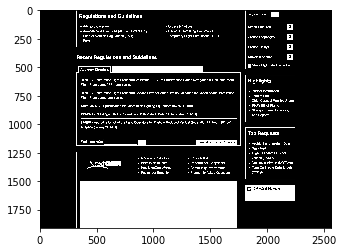

In [95]:
reference = np.asarray(Image.open('components/faa-gov/screenshotdiv-class-twoColumn/0/normalised.jpg').convert('RGB'))
reference = cv2.imread()
plt.imshow(reference)
np.amax(reference)

255


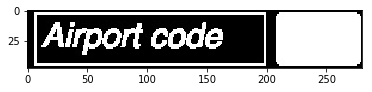

In [93]:
comp = np.asarray(Image.open("components/faa-gov/screenshotdiv-class-twoColumn/0/3.jpg").convert('RGB'))
plt.imshow(comp)
print (np.amax(comp))

In [96]:
result = find_image (reference,comp)
print (result)

False


255


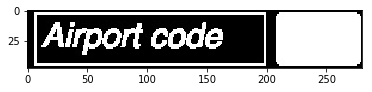

In [99]:
# comp2 = np.asarray(Image.open("/Users/waleed/Desktop/normalised.jpg").convert('RGB'))
comp2 = cv2.imread("/Users/waleed/Desktop/normalised.jpg")
plt.imshow(comp)
print (np.amax(comp))

In [100]:
result = find_image (reference,comp2)
print (result)

False
